### Import semua library yang dibutuhkan

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# agar matplotlib langsung muncul di bawah cell dimana matplotlib dipanggil
%matplotlib inline

### Membaca file datase dan menghapus data yang duplikat

In [280]:
# Membaca data dari file crime.csv dengan menggunakan encoding "ISO-8859-4"
crime = pd.read_csv("crime.csv", encoding="ISO-8859-4")

In [281]:
# Melihat dengan sekilas struktur data dari dataset
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [282]:
# Mengecek dimensi dari dataset dengan menggunakan shape
crime.shape

(319073, 17)

In [283]:
# Menghitung jumlah data yang duplikat dengan menggunakan .duplicated()
crime.duplicated().sum()

23

In [284]:
# Menghapus data yang duplikat, dan menggunakan `inplace=True` agar crime langsung menggunakan data baru
crime.drop_duplicates(inplace=True) # Dropping the duplicate rows

In [285]:
# Menghitung kembali data yang duplikat
crime.duplicated().sum()

0

In [286]:
# Mengecek kembali dimensei dari data set setelah menghapus data yang duplikat
crime.shape

(319050, 17)

### Eksplorasi dataset

In [287]:
# Mengecek bagian awal dari dataset
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [288]:
# Mengecek bagian akhir dari dataset
crime.tail()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"
319072,142052550,3125,Warrant Arrests,WARRANT ARREST,D4,903,NaN,2015-06-22 00:12:00,2015,6,Monday,0,Part Three,WASHINGTON ST,42.333839,-71.080290,"(42.33383935, -71.08029038)"


In [289]:
# Memberikan maksimal 6 baris (awal dan akhir) saat menampilkan dataset
pd.options.display.max_rows = 10
crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [290]:
# Mengecek informasi setiap kolom dari dataset yaitu data yang tidak null dan tipe datanya
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [291]:
# Mengubah tipe data dari `OCCURRED_ON_DATE` menjadi datetime, agar dapat digunakan lebih leluasa
crime.OCCURRED_ON_DATE = pd.to_datetime(crime.OCCURRED_ON_DATE)

In [292]:
# Mengecek kembali apakah tipe data dari `OCCURRED_ON_DATE` sudah berubah
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319050 non-null  datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [293]:
# Dengan gampang mengesktrak tipe data dari `OCCURRED_ON_DATE` menjadi Tahun, Bulan, Minggu, Hari, Jam dan Menit
crime.OCCURRED_ON_DATE.dt.year

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
319068    2016
319069    2015
319070    2015
319071    2016
319072    2015
Name: OCCURRED_ON_DATE, Length: 319050, dtype: int32

In [294]:
# Mengecek data dengan type data yang berhubungan dengan angka
crime.describe()

,OFFENSE_CODE,OCCURRED_ON_DATE,YEAR,MONTH,HOUR,Lat,Long
count,319050.000000,319050,319050.000000,319050.000000,319050.000000,299052.000000,299052.000000
mean,2317.516957,2017-01-25 12:35:59.149211904,2016.560674,6.609622,13.118176,42.214373,-70.908260
min,111.000000,2015-06-15 00:00:00,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016-04-12 03:30:00,2016.000000,4.000000,9.000000,42.297438,-71.097135
50%,2907.000000,2017-01-28 04:36:00,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017-11-05 18:39:00,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018-09-03 21:25:00,2018.000000,12.000000,23.000000,42.395042,-1.000000
std,1185.308921,NaN,0.996312,3.273677,6.294258,2.159845,3.493746


In [295]:
# Mengecek data dengan type data object
crime.describe(include='object')

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [296]:
# Mengecek semua column yang ada pada dataset
crime.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [297]:
# Mengecek column yang memiliki missing values
crime.columns[np.sum(crime.isnull()) != 0]

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'UCR_PART', 'STREET', 'Lat', 'Long'], dtype='object')

In [298]:
# Mengecek column yang tidak memiliki missing values 
crime.columns[np.sum(crime.isnull()) == 0]

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'Location'],
      dtype='object')

In [299]:
# Checking for the number of unique values in each column
for col in crime.columns:
    unique_count = crime[col].nunique()
    print(col + " memiliki " + str(unique_count) + " value yang unik")

INCIDENT_NUMBER memiliki 282517 value yang unik
OFFENSE_CODE memiliki 222 value yang unik
OFFENSE_CODE_GROUP memiliki 67 value yang unik
OFFENSE_DESCRIPTION memiliki 244 value yang unik
DISTRICT memiliki 12 value yang unik
REPORTING_AREA memiliki 879 value yang unik
SHOOTING memiliki 1 value yang unik
OCCURRED_ON_DATE memiliki 233229 value yang unik
YEAR memiliki 4 value yang unik
MONTH memiliki 12 value yang unik
DAY_OF_WEEK memiliki 7 value yang unik
HOUR memiliki 24 value yang unik
UCR_PART memiliki 4 value yang unik
STREET memiliki 4657 value yang unik
Lat memiliki 18178 value yang unik
Long memiliki 18178 value yang unik
Location memiliki 18194 value yang unik


### List Pertanyaan

In [300]:
# Question 1 - Apa deskripsi pelanggaran yang paling sering terjadi?
offense_description = crime.OFFENSE_DESCRIPTION.value_counts()
offense_description

# Pelanggaran paling banyak adalah SICK/INJURED/MEDICAL - PERSON sebanyak 18783 kali
# Pelanggaran paling sedikit adalah DRUGS - POSS CLASS D - INTENT MFR DIST DISP sebanyak 1 kali

OFFENSE_DESCRIPTION
SICK/INJURED/MEDICAL - PERSON                  18783
INVESTIGATE PERSON                             18753
M/V - LEAVING SCENE - PROPERTY DAMAGE          16323
VANDALISM                                      15153
ASSAULT SIMPLE - BATTERY                       14791
                                               ...  
KILLING OF FELON BY POLICE                         1
AUTO THEFT - OUTSIDE - RECOVERED IN BOSTON         1
DRUGS - GLUE INHALATION                            1
ROBBERY - KNIFE - STREET                           1
DRUGS - POSS CLASS D - INTENT MFR DIST DISP        1
Name: count, Length: 244, dtype: int64

Text(0, 0.5, 'Persentase')

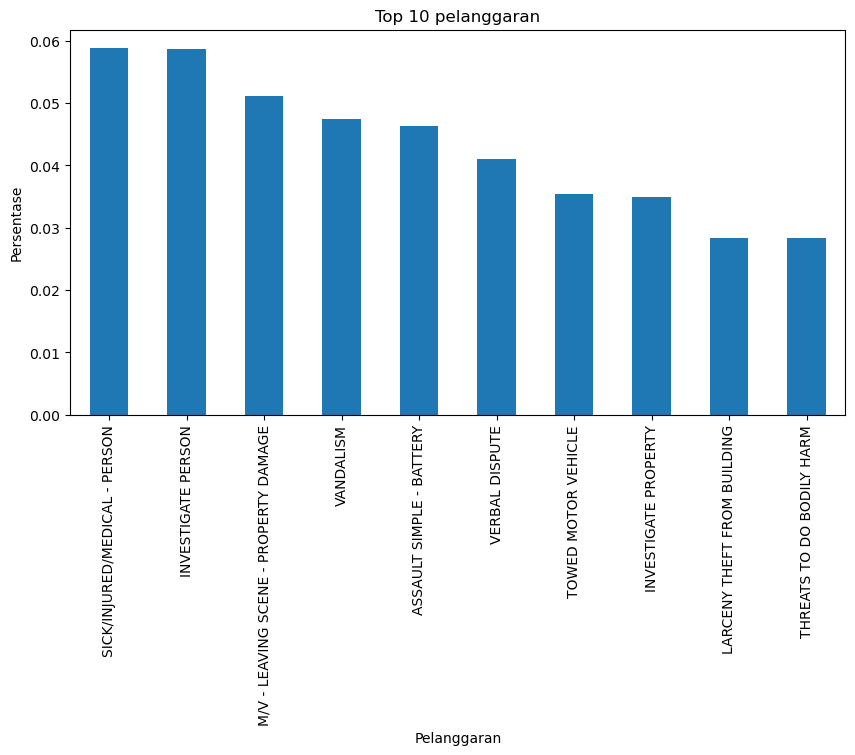

In [301]:
# Question 2 - Buatlah bar chart dari top 10 pelanggaran 

# Menghitung persentase dari top 10 pelanggaran
offense_description_by_percent = (offense_description / crime.shape[0])[:10]
# Membuat bar chart
offense_description_by_percent.plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 pelanggaran')
plt.xlabel('Pelanggaran')
plt.ylabel('Persentase')

Text(0, 0.5, 'Total Insiden')

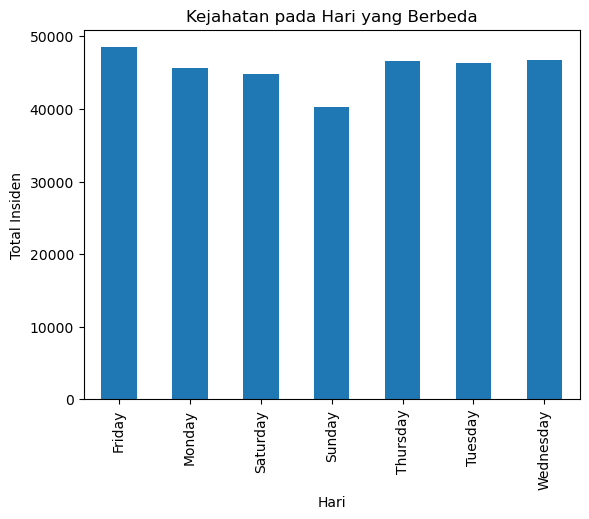

In [302]:
# Question 3a - Are there more crimes committed on specific days?

# Kelompokkan data berdasarkan hari
day_of_week_group = crime.groupby('DAY_OF_WEEK')
# Menjumlahkan total insiden berdasarkan hari yang berbeda
day_of_week_group_count_by_incident_number = day_of_week_group.count()['INCIDENT_NUMBER']
# Membuat bar chart
day_of_week_group_count_by_incident_number.plot(kind='bar')
plt.title('Kejahatan pada Hari yang Berbeda')
plt.xlabel('Hari')
plt.ylabel('Total Insiden')

Text(0, 0.5, 'Total Insiden')

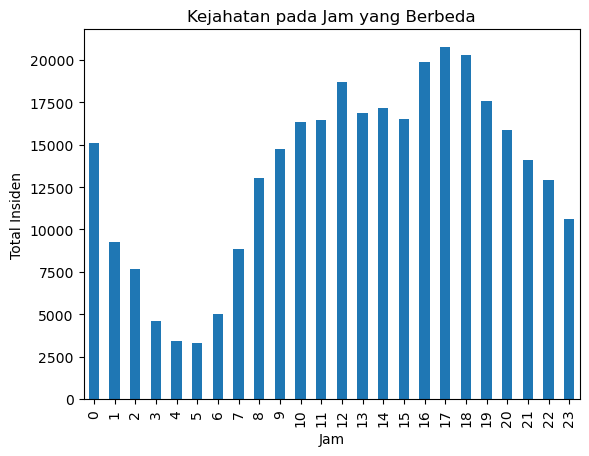

In [303]:
# Question 3b - Are there more crimes during specific hours?

# Kelompokkan data berdasarkan jam
hour_group = crime.groupby('HOUR')
# Menjumlahkan total insiden berdasarkan jam yang berbeda
hour_group_count_by_incident_number = hour_group.count()['INCIDENT_NUMBER']
# Membuat bar chart
hour_group_count_by_incident_number.plot(kind='bar')
plt.title('Kejahatan pada Jam yang Berbeda')
plt.xlabel("Jam")
plt.ylabel("Total Insiden")

Text(50.722222222222214, 0.5, 'Jam')

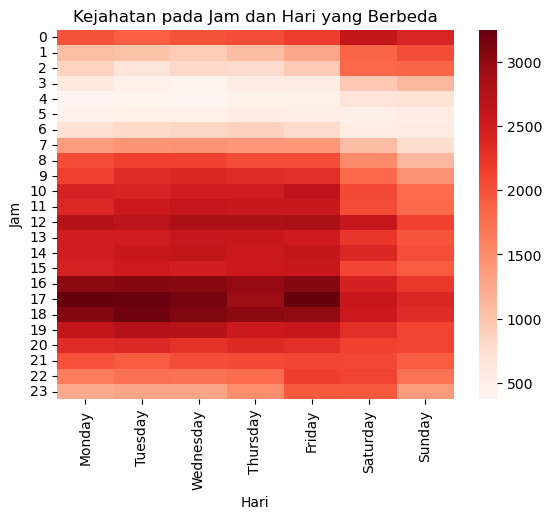

In [304]:
# Question 4 - On what days and during which hours are the most crimes committed?

# Mengelompokkan data berdasarkan jam dan hari
hour_day_group = crime.groupby(['HOUR','DAY_OF_WEEK'])
# Menjumlahkan total insiden berdasarkan jam dan hari yang berbeda
hour_day_group_count_by_incident_number = hour_day_group.count()['INCIDENT_NUMBER']
# Mengubah tipe data dari series menjadi matrix agar dapat menggunakan heatmap
hour_day_group_count_by_incident_number = hour_day_group_count_by_incident_number.unstack()
# Menentukan urutan hari
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# Mengatur urutan hari menggunakan metode 'reindex'
hour_day_group_count_by_incident_number = hour_day_group_count_by_incident_number.reindex(ordered_days, axis=1)
# Membuat heatmap dengan menggunakan warna merah sebagai color map 
sns.heatmap(hour_day_group_count_by_incident_number, cmap="Reds")
plt.title("Kejahatan pada Jam dan Hari yang Berbeda")
plt.xlabel("Hari")
plt.ylabel("Jam")

Text(50.722222222222214, 0.5, 'District')

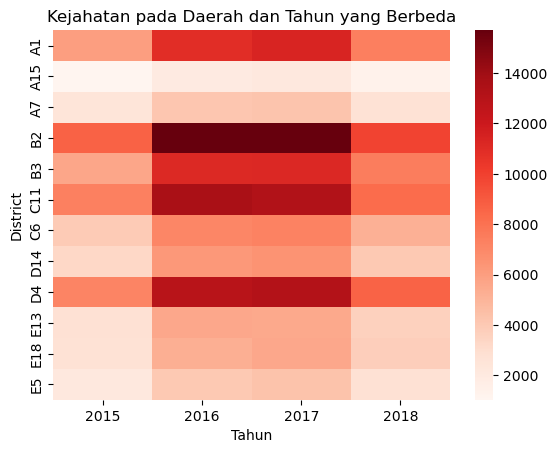

In [305]:
# Question 5 - In which districts were the most crimes commmitted on yearly basis? 

# Mengelompokkan data berdasarkan daerah dan tahun
district_year_group = crime.groupby(["DISTRICT", "YEAR"])
# Menjumlahkan total insiden berdasarkan daerah dan tahun yang berbeda
district_year_group_matrix = district_year_group.count()['INCIDENT_NUMBER']
# Mengubah tipe data dari series menjadi matrix agar dapat menggunakan heatmap
district_year_group_matrix = district_year_group_matrix.unstack()
# Membuat heatmap dengan menggunakan warna merah sebagai color map 
sns.heatmap(district_year_group_matrix, cmap="Reds")
plt.title("Kejahatan pada Daerah dan Tahun yang Berbeda")
plt.xlabel("Tahun")
plt.ylabel("District")

In [306]:
for year in range(2015, 2019):
    print(year, district_year_group_matrix[year].idxmax())

2015 B2
2016 B2
2017 B2
2018 B2
